## The dataset citydata.csv contains the coordinates of 60 locations from which we want to create 4 clusters.

### Importing libraries

In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans as kmeans
import numpy as np

### Reading file through the CSV package

In [2]:
import csv
def readFileThroughCSV(filename):
    #This function loads everything as a reader object that can be converted to a Python list, and then data can be extracted.
    csvfile = open(filename)
    readerobject = csv.reader(csvfile, delimiter=',')
    lst = list(readerobject)
    csvfile.close()

    dataX = [x[1] for x in lst[1:]]
    dataY = [x[2] for x in lst[1:]]

    arrX = np.array(dataX)
    arrX = arrX.astype(float)
    arrY = np.array(dataY)
    arrY = arrY.astype(float)

    arr = np.array([arrX,arrY])
    arr = np.transpose(arr)
    return(arr)

### Reading file through the Pandas package

In [3]:
import pandas as pd
def readFileThroughPandas(filename):
    csvfile = pd.read_csv(filename)

    arrX = csvfile["X"]
    arrY = csvfile["Y"]

    arr = np.array([arrX,arrY])
    arr = np.transpose(arr)
    return(arr)

### Read the CSV file using one of the above functions and plot the data

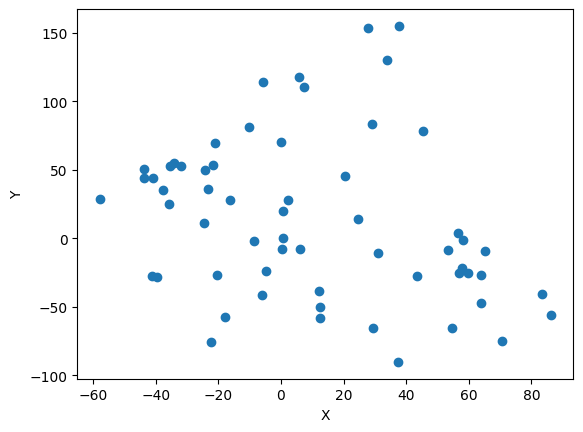

In [4]:
#arr = readFileThroughCSV("citydata.csv")
arr = readFileThroughPandas("citydata.csv")

#Now arr contains the data as a list two stacked columns of X and Y coordinates
#print(arr)

plt.scatter(arr[:,0],arr[:,1])
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

### Perform clustering

In [5]:
kmeans_model = kmeans(n_clusters=4)
kmeans_model.fit(arr)

#Each point gets a label based on the cluster to which it belongs to
lab = kmeans_model.labels_

#Each clustrer has a centroid
centroid = kmeans_model.cluster_centers_

#Total within-cluster sum of squares (wss)
inertia = kmeans_model.inertia_

#print(inertia)
#print(lab)

### Plotting the four clusters in different colours

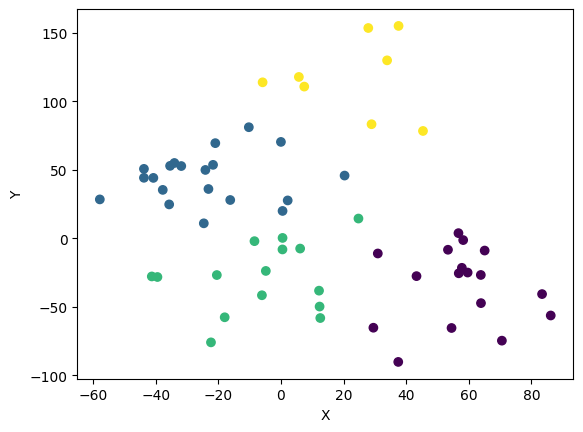

In [6]:
# Plot in single line
plt.scatter(arr[:,0],arr[:,1], c=lab)

#Or plot one by one as follows
#for i in range(max(lab)+1):
#    arrNew = arr[lab==i]
#    plt.plot(arrNew[:,0],arrNew[:,1],'*')

plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## Storing the information in a file

In [7]:
diction = {
    "X": arr[:,0],
    "Y": arr[:,1],
    "Labels": lab
}

df = pd.DataFrame(data=diction)
df.to_csv('output.csv')
#df.to_excel('output.xlsx')

### Elbow plot to determine optimal number of clusters

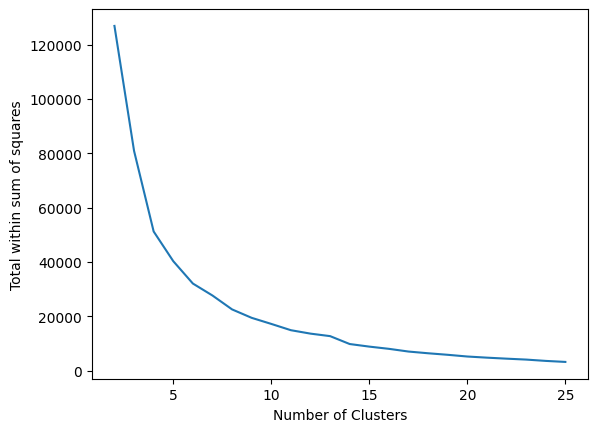

In [8]:
#Perform clustering for n_clusters from 2 to 25
num_clusters = np.arange(2,26)
i = 0;
n_inertia = np.zeros(num_clusters.shape)
for n in num_clusters:
    kmeans_model = kmeans(n_clusters=n)
    kmeans_model.fit(arr)
    n_inertia[i] = kmeans_model.inertia_
    i=i+1

plt.plot(num_clusters,n_inertia)
plt.xlabel("Number of Clusters")
plt.ylabel("Total within sum of squares")
plt.show()

### Note that in the figure above, the elbow is around 5